<a href="https://colab.research.google.com/github/KenzaChraibi/Devoir-ML1/blob/main/Devoir_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Général

In [1]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

#Récupérer les données pour la classification
!rm -rf Devoir-ML1/
!git clone https://github.com/KenzaChraibi/Devoir-ML1

#Loader les données pour la classification
data = np.load("/content/Devoir-ML1/a22_devoir_q2-classification.npz")
X = data["X"]
y = data["y"]

Cloning into 'Devoir-ML1'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 6), reused 5 (delta 1), pack-reused 0
Unpacking objects: 100% (18/18), done.


# Question 2 : Classification

## Question 2.1

[Text(0.5, 1.0, 'Exploration visuelle des données')]

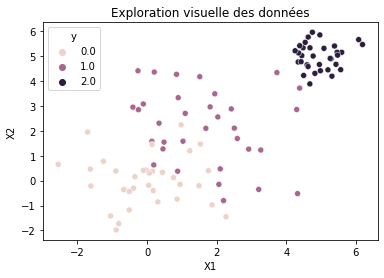

In [ ]:
# Visualisation
df = pd.DataFrame(np.column_stack((X,y)), columns = ['X1','X2','y'])
#fig, (ax1, ax2) = plt.subplots(1, 2)
#ax1.scatter(X[:,0],X[:,1])
#sns.scatterplot(ax=ax2, x="X1", y="X2", data=df, hue="y")
sns.scatterplot(x="X1", y="X2", data=df, hue="y").set(title='Exploration visuelle des données')

## Question 2.2

In [ ]:
#Diviser l'échantillon en 3
from sklearn.model_selection import train_test_split
X_train, X_VT, y_train, y_VT = train_test_split(
    X, y, test_size=0.4, random_state=1234)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_VT, y_VT, test_size=0.5, random_state=1234)
#Vérifier la séparation
print(len(X_train),len(X_valid),len(X_test))

60 20 20


In [ ]:
#Entraîner un SVM
from sklearn.svm import SVC
a=0
acc_train=[]
acc_valid=[]
for i in [0.001, 0.01, 0.1, 1, 10]:
  model = SVC(kernel='linear', C=i)
  model.fit(X_train, y_train)
  acc_train.append((sum(model.predict(X_train)==y_train)/len(y_train))*100)
  acc_valid.append((sum(model.predict(X_valid)==y_valid)/len(y_valid)) *100) 
  print("For C= ",i,", train accuracy is ", "{:.2f}".format(acc_train[a]), "%",
        " & valid accuracy is ", "{:.2f}".format(acc_valid[a]), "%")
  a+=1

For C=  0.001 , train accuracy is  38.33 %  & valid accuracy is  25.00 %
For C=  0.01 , train accuracy is  86.67 %  & valid accuracy is  85.00 %
For C=  0.1 , train accuracy is  88.33 %  & valid accuracy is  85.00 %
For C=  1 , train accuracy is  88.33 %  & valid accuracy is  85.00 %
For C=  10 , train accuracy is  90.00 %  & valid accuracy is  85.00 %


In [ ]:
# Entraîner le meilleur SVM sur l'ensemble de test
model = SVC(kernel='linear', C=10)
model.fit(X_train,y_train)
acc = (sum(model.predict(X_test)==y_test)/len(y_test))*100
print('Le taux de bonne classification du meilleur modèle pour le test est ', 
      "{:.2f}".format(acc),'%')

Le taux de bonne classification du meilleur modèle pour le test est  85.00 %


## Question 2.3

In [ ]:
# Combiner les datasets train et valid pour la validation croisée
X_cv = np.row_stack((X_train, X_valid))
y_cv = np.concatenate((y_train,y_valid))

# Entraîner un SVM par CV
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

for i in [0.001, 0.01, 0.1, 1, 10]:
  model = SVC(kernel='linear', C=i)
  cv_score = cross_validate(model, X_cv, y_cv, cv=10, 
                            scoring='accuracy',return_train_score=True)
  print('For C= ',i,', mean train accuracy is ', "{:.4f}".format(np.mean(cv_score['train_score'])),
        ' & mean valid accuracy is ', "{:.4f}".format(np.mean(cv_score['test_score'])))
  

For C=  0.001 , mean train accuracy is  0.5472  & mean valid accuracy is  0.5250
For C=  0.01 , mean train accuracy is  0.8819  & mean valid accuracy is  0.8750
For C=  0.1 , mean train accuracy is  0.8889  & mean valid accuracy is  0.8750
For C=  1 , mean train accuracy is  0.8903  & mean valid accuracy is  0.8750
For C=  10 , mean train accuracy is  0.9028  & mean valid accuracy is  0.8750


In [ ]:
# Obtenir les prédictions pour l'ensemble de test
# Meilleur modèle avec C=10
model = SVC(kernel='linear', C=10)
cv_score = cross_validate(model, X_cv, y_cv, cv=10, 
             scoring='accuracy',return_train_score=True, return_estimator=True)
# Obtenir 10 prédictions par exemple, soit 1 par modèle du 10-fold
pred = np.ones((10,20))
for i in np.arange(0,10,1):
  pred[i] = cv_score['estimator'][i].predict(X_test)
pred = pred.T #Chaque ligne contient les 10 prédictions pour un même exemple

# Parcourir les 20 exemples du test pour déterminer la classe majoritaire
test_pred = np.ones(20)
for a in np.arange(0,20,1):
  values, counts = np.unique(pred[a], return_counts=True)
  test_pred[a] = values[np.argmax(counts)]#Classe majoritaire par exemple

acc = (sum(test_pred==y_test)/len(y_test))*100
print('Le taux de bonne classification du meilleur modèle pour le test est ', 
      "{:.2f}".format(acc),'%')

Le taux de bonne classification du meilleur modèle pour le test est  95.00 %


# Question 3 : Régression

## Pré-traitement des données

In [21]:
# Loader les données de régression
df = pd.read_csv('/content/Devoir-ML1/reviews.tsv', sep='\t', header=None)
df.columns = ['Review', 'Critic']

#Enlever les nan
from numpy import nan
Critic = [item for item in df.Critic if not(pd.isnull(item)) == True]
Review = df.Review[pd.isnull(df.Critic)==False]

In [22]:
#Diviser l'échantillon en 3
from sklearn.model_selection import train_test_split
X_train, X_VT, y_train, y_VT = train_test_split(
    Critic, Review, test_size=0.2, random_state=1234)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_VT, y_VT, test_size=0.5, random_state=1234)
#Vérifier la séparation
print(len(X_train),len(X_valid),len(X_test))

7994 999 1000


In [23]:
# Représentation Bag-of-words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000,stop_words="english")
X_trainB = vectorizer.fit_transform(X_train)
X_validB = vectorizer.transform(X_valid)
X_testB = vectorizer.transform(X_test)

# Vérifier le nombre de mots conservés
vectorizer.get_feature_names_out().shape

(2000,)

## Algorithme K-NN

In [13]:
# Entraîner un KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
MSE_train = []
MSE_valid = []
for k in [1, 10, 50, 100, 1000]:
  knn = KNeighborsRegressor(n_neighbors = k, metric='cosine')
  knn.fit(X_trainB, y_train)

  t_pred = knn.predict(X_trainB)
  v_pred = knn.predict(X_validB)

  MSE_train.append(mean_squared_error(y_train, t_pred))
  MSE_valid.append(mean_squared_error(y_valid, v_pred))

  print("For K= ",k,", train MSE is ", "{:.4f}".format(MSE_train[-1]),
        " & valid MSE is ", "{:.4f}".format(MSE_valid[-1]))

For K=  1 , train MSE is  0.0001  & valid MSE is  1.4835
For K=  10 , train MSE is  0.6871  & valid MSE is  0.8358
For K=  50 , train MSE is  0.7847  & valid MSE is  0.8066
For K=  100 , train MSE is  0.8067  & valid MSE is  0.8209
For K=  1000 , train MSE is  0.8781  & valid MSE is  0.8766


## Réseau de neurones

In [14]:
# Général
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

### Impact isolé

In [ ]:
# Impact du learning rate
rates = [100, 10, 1, 0.01, 0.001, 0.0001]
MSE = []
for r in rates:
  regNN = MLPRegressor(hidden_layer_sizes=(20),
                   random_state=1234,
                   early_stopping=True,
                   alpha = 1,
                   learning_rate_init = r)
  regNN.fit(X_trainB, y_train)
  MSE.append(mean_squared_error(y_valid, regNN.predict(X_validB)))

print(MSE)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Impact du taux de régularisation
L2_rates = [100000, 10000, 1000, 100, 10, 1, 0.01, 0.001, 0.0001]
MSE = []
for a in L2_rates:
  regNN = MLPRegressor(hidden_layer_sizes=(8,8),
                   random_state=1234,
                   early_stopping=True,
                   alpha = a,
                   learning_rate_init = 1)
  regNN.fit(X_trainB, y_train)
  MSE.append(mean_squared_error(y_valid, regNN.predict(X_validB)))

print(MSE)

[0.9662148886099685, 0.9661192477751567, 0.9657721802908519, 0.9659576881012271, 0.9655140685991069, 0.9655826361820298, 0.9668421805611846, 0.9655236911011322, 1.0287216068726073]


In [ ]:
# Impact des couches cachées
HL = [200,200,200,200,200,200,200,200,200,200]
MSE = []
for i in np.arange(1,11,1):
  regNN = MLPRegressor(hidden_layer_sizes=tuple(HL[0:i]),
                   random_state=1234,
                   early_stopping=True,
                   alpha = a,
                   learning_rate_init = 1)
  regNN.fit(X_trainB, y_train)
  MSE.append(mean_squared_error(y_valid, regNN.predict(X_validB)))

print(MSE)

[0.967781504968291, 6.653080035914073, 186.54175044567657, 87.31941333096891, 4.209356058778389, 1618.172736942552, 0.9669251491529409, 0.9656188789441977, 73.1255170449431, 780.7103258237022]


### Impact global

In [15]:
# Grid search de la meilleure combinaison d'hyperparamètres
rates = [100, 10, 1, 0.1, 0.01, 0.001]
L2_rates = [100, 10, 1, 0.1, 0.01, 0.001]
HL = [[4], [4,4], [4,4,4], [4,4,4,4],
      [10], [10,10], [10,10,10], [10,10,10,10],
      [20], [20,20], [20,20,20], [20,20,20,20], [20,20,20,20,20]]
Learn_rate = []
L2_rate = []
Hid_lay = []
MSE = []

for i in HL:
  for a in L2_rates:
    for r in rates:
      Hid_lay.append(i)
      L2_rate.append(a)
      Learn_rate.append(r)
      print(i,a,r)
      regNN = MLPRegressor(hidden_layer_sizes=tuple(i),
                           random_state=1234,
                           early_stopping=True,
                           alpha = a,
                           learning_rate_init = r)
      regNN.fit(X_trainB, y_train)
      MSE.append(mean_squared_error(y_valid, regNN.predict(X_validB)))

results = pd.DataFrame({'Hidden_layers_size':Hid_lay, 'Regularization': L2_rate,
                        'Learning_rate': Learn_rate, 'MSE': MSE})
display(results.sort_values('MSE'))

[4] 100 100
[4] 100 10
[4] 100 1
[4] 100 0.1
[4] 100 0.01
[4] 100 0.001


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[4] 10 100
[4] 10 10
[4] 10 1
[4] 10 0.1
[4] 10 0.01
[4] 10 0.001
[4] 1 100
[4] 1 10
[4] 1 1
[4] 1 0.1
[4] 1 0.01
[4] 1 0.001
[4] 0.1 100
[4] 0.1 10
[4] 0.1 1
[4] 0.1 0.1
[4] 0.1 0.01
[4] 0.1 0.001
[4] 0.01 100
[4] 0.01 10
[4] 0.01 1
[4] 0.01 0.1
[4] 0.01 0.01
[4] 0.01 0.001
[4] 0.001 100
[4] 0.001 10
[4] 0.001 1
[4] 0.001 0.1
[4] 0.001 0.01
[4] 0.001 0.001
[4, 4] 100 100
[4, 4] 100 10
[4, 4] 100 1
[4, 4] 100 0.1
[4, 4] 100 0.01
[4, 4] 100 0.001
[4, 4] 10 100
[4, 4] 10 10
[4, 4] 10 1
[4, 4] 10 0.1
[4, 4] 10 0.01
[4, 4] 10 0.001
[4, 4] 1 100
[4, 4] 1 10
[4, 4] 1 1
[4, 4] 1 0.1
[4, 4] 1 0.01
[4, 4] 1 0.001
[4, 4] 0.1 100
[4, 4] 0.1 10
[4, 4] 0.1 1
[4, 4] 0.1 0.1
[4, 4] 0.1 0.01
[4, 4] 0.1 0.001
[4, 4] 0.01 100
[4, 4] 0.01 10
[4, 4] 0.01 1
[4, 4] 0.01 0.1
[4, 4] 0.01 0.01
[4, 4] 0.01 0.001
[4, 4] 0.001 100
[4, 4] 0.001 10
[4, 4] 0.001 1
[4, 4] 0.001 0.1
[4, 4] 0.001 0.01
[4, 4] 0.001 0.001
[4, 4, 4] 100 100
[4, 4, 4] 100 10
[4, 4, 4] 100 1
[4, 4, 4] 100 0.1
[4, 4, 4] 100 0.01
[4, 4, 4] 10

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[4, 4, 4] 1 10
[4, 4, 4] 1 1
[4, 4, 4] 1 0.1
[4, 4, 4] 1 0.01
[4, 4, 4] 1 0.001
[4, 4, 4] 0.1 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[4, 4, 4] 0.1 10
[4, 4, 4] 0.1 1
[4, 4, 4] 0.1 0.1
[4, 4, 4] 0.1 0.01
[4, 4, 4] 0.1 0.001
[4, 4, 4] 0.01 100
[4, 4, 4] 0.01 10
[4, 4, 4] 0.01 1
[4, 4, 4] 0.01 0.1
[4, 4, 4] 0.01 0.01
[4, 4, 4] 0.01 0.001
[4, 4, 4] 0.001 100
[4, 4, 4] 0.001 10
[4, 4, 4] 0.001 1
[4, 4, 4] 0.001 0.1
[4, 4, 4] 0.001 0.01
[4, 4, 4] 0.001 0.001
[4, 4, 4, 4] 100 100
[4, 4, 4, 4] 100 10
[4, 4, 4, 4] 100 1
[4, 4, 4, 4] 100 0.1
[4, 4, 4, 4] 100 0.01
[4, 4, 4, 4] 100 0.001
[4, 4, 4, 4] 10 100
[4, 4, 4, 4] 10 10
[4, 4, 4, 4] 10 1
[4, 4, 4, 4] 10 0.1
[4, 4, 4, 4] 10 0.01
[4, 4, 4, 4] 10 0.001
[4, 4, 4, 4] 1 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[4, 4, 4, 4] 1 10
[4, 4, 4, 4] 1 1
[4, 4, 4, 4] 1 0.1
[4, 4, 4, 4] 1 0.01
[4, 4, 4, 4] 1 0.001
[4, 4, 4, 4] 0.1 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[4, 4, 4, 4] 0.1 10
[4, 4, 4, 4] 0.1 1
[4, 4, 4, 4] 0.1 0.1
[4, 4, 4, 4] 0.1 0.01
[4, 4, 4, 4] 0.1 0.001
[4, 4, 4, 4] 0.01 100
[4, 4, 4, 4] 0.01 10
[4, 4, 4, 4] 0.01 1
[4, 4, 4, 4] 0.01 0.1
[4, 4, 4, 4] 0.01 0.01
[4, 4, 4, 4] 0.01 0.001
[4, 4, 4, 4] 0.001 100
[4, 4, 4, 4] 0.001 10
[4, 4, 4, 4] 0.001 1
[4, 4, 4, 4] 0.001 0.1
[4, 4, 4, 4] 0.001 0.01
[4, 4, 4, 4] 0.001 0.001
[10] 100 100
[10] 100 10
[10] 100 1
[10] 100 0.1
[10] 100 0.01
[10] 100 0.001
[10] 10 100
[10] 10 10
[10] 10 1
[10] 10 0.1
[10] 10 0.01
[10] 10 0.001
[10] 1 100
[10] 1 10
[10] 1 1
[10] 1 0.1
[10] 1 0.01
[10] 1 0.001
[10] 0.1 100
[10] 0.1 10
[10] 0.1 1
[10] 0.1 0.1
[10] 0.1 0.01
[10] 0.1 0.001
[10] 0.01 100
[10] 0.01 10
[10] 0.01 1
[10] 0.01 0.1
[10] 0.01 0.01
[10] 0.01 0.001
[10] 0.001 100
[10] 0.001 10
[10] 0.001 1
[10] 0.001 0.1
[10] 0.001 0.01
[10] 0.001 0.001
[10, 10] 100 100
[10, 10] 100 10
[10, 10] 100 1
[10, 10] 100 0.1
[10, 10] 100 0.01
[10, 10] 100 0.001
[10, 10] 10 100
[10, 10] 10 10
[10, 10] 10 1
[10, 10] 1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[10, 10] 0.01 10
[10, 10] 0.01 1
[10, 10] 0.01 0.1
[10, 10] 0.01 0.01
[10, 10] 0.01 0.001
[10, 10] 0.001 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[10, 10] 0.001 10
[10, 10] 0.001 1
[10, 10] 0.001 0.1
[10, 10] 0.001 0.01
[10, 10] 0.001 0.001
[10, 10, 10] 100 100
[10, 10, 10] 100 10
[10, 10, 10] 100 1
[10, 10, 10] 100 0.1
[10, 10, 10] 100 0.01
[10, 10, 10] 100 0.001
[10, 10, 10] 10 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[10, 10, 10] 10 10
[10, 10, 10] 10 1
[10, 10, 10] 10 0.1
[10, 10, 10] 10 0.01
[10, 10, 10] 10 0.001
[10, 10, 10] 1 100
[10, 10, 10] 1 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[10, 10, 10] 1 1
[10, 10, 10] 1 0.1
[10, 10, 10] 1 0.01
[10, 10, 10] 1 0.001
[10, 10, 10] 0.1 100
[10, 10, 10] 0.1 10
[10, 10, 10] 0.1 1
[10, 10, 10] 0.1 0.1
[10, 10, 10] 0.1 0.01
[10, 10, 10] 0.1 0.001
[10, 10, 10] 0.01 100
[10, 10, 10] 0.01 10
[10, 10, 10] 0.01 1
[10, 10, 10] 0.01 0.1
[10, 10, 10] 0.01 0.01
[10, 10, 10] 0.01 0.001
[10, 10, 10] 0.001 100
[10, 10, 10] 0.001 10
[10, 10, 10] 0.001 1
[10, 10, 10] 0.001 0.1
[10, 10, 10] 0.001 0.01
[10, 10, 10] 0.001 0.001
[10, 10, 10, 10] 100 100
[10, 10, 10, 10] 100 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[10, 10, 10, 10] 100 1
[10, 10, 10, 10] 100 0.1
[10, 10, 10, 10] 100 0.01
[10, 10, 10, 10] 100 0.001
[10, 10, 10, 10] 10 100
[10, 10, 10, 10] 10 10
[10, 10, 10, 10] 10 1
[10, 10, 10, 10] 10 0.1
[10, 10, 10, 10] 10 0.01
[10, 10, 10, 10] 10 0.001
[10, 10, 10, 10] 1 100
[10, 10, 10, 10] 1 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[10, 10, 10, 10] 1 1
[10, 10, 10, 10] 1 0.1
[10, 10, 10, 10] 1 0.01
[10, 10, 10, 10] 1 0.001
[10, 10, 10, 10] 0.1 100
[10, 10, 10, 10] 0.1 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[10, 10, 10, 10] 0.1 1
[10, 10, 10, 10] 0.1 0.1
[10, 10, 10, 10] 0.1 0.01
[10, 10, 10, 10] 0.1 0.001
[10, 10, 10, 10] 0.01 100
[10, 10, 10, 10] 0.01 10
[10, 10, 10, 10] 0.01 1
[10, 10, 10, 10] 0.01 0.1
[10, 10, 10, 10] 0.01 0.01
[10, 10, 10, 10] 0.01 0.001
[10, 10, 10, 10] 0.001 100
[10, 10, 10, 10] 0.001 10
[10, 10, 10, 10] 0.001 1
[10, 10, 10, 10] 0.001 0.1
[10, 10, 10, 10] 0.001 0.01
[10, 10, 10, 10] 0.001 0.001
[20] 100 100
[20] 100 10
[20] 100 1
[20] 100 0.1
[20] 100 0.01
[20] 100 0.001
[20] 10 100
[20] 10 10
[20] 10 1
[20] 10 0.1
[20] 10 0.01
[20] 10 0.001
[20] 1 100
[20] 1 10
[20] 1 1
[20] 1 0.1
[20] 1 0.01
[20] 1 0.001
[20] 0.1 100
[20] 0.1 10
[20] 0.1 1
[20] 0.1 0.1
[20] 0.1 0.01
[20] 0.1 0.001
[20] 0.01 100
[20] 0.01 10
[20] 0.01 1
[20] 0.01 0.1
[20] 0.01 0.01
[20] 0.01 0.001
[20] 0.001 100
[20] 0.001 10
[20] 0.001 1
[20] 0.001 0.1
[20] 0.001 0.01
[20] 0.001 0.001
[20, 20] 100 100
[20, 20] 100 10
[20, 20] 100 1
[20, 20] 100 0.1
[20, 20] 100 0.01
[20, 20] 100 0.001
[20, 20] 10

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20] 10 10
[20, 20] 10 1
[20, 20] 10 0.1
[20, 20] 10 0.01
[20, 20] 10 0.001
[20, 20] 1 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20] 1 10
[20, 20] 1 1
[20, 20] 1 0.1
[20, 20] 1 0.01
[20, 20] 1 0.001
[20, 20] 0.1 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20] 0.1 10
[20, 20] 0.1 1
[20, 20] 0.1 0.1
[20, 20] 0.1 0.01
[20, 20] 0.1 0.001
[20, 20] 0.01 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20] 0.01 10
[20, 20] 0.01 1
[20, 20] 0.01 0.1
[20, 20] 0.01 0.01
[20, 20] 0.01 0.001
[20, 20] 0.001 100
[20, 20] 0.001 10
[20, 20] 0.001 1
[20, 20] 0.001 0.1
[20, 20] 0.001 0.01
[20, 20] 0.001 0.001
[20, 20, 20] 100 100
[20, 20, 20] 100 10
[20, 20, 20] 100 1
[20, 20, 20] 100 0.1
[20, 20, 20] 100 0.01
[20, 20, 20] 100 0.001
[20, 20, 20] 10 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20, 20] 10 10
[20, 20, 20] 10 1
[20, 20, 20] 10 0.1
[20, 20, 20] 10 0.01
[20, 20, 20] 10 0.001
[20, 20, 20] 1 100
[20, 20, 20] 1 10
[20, 20, 20] 1 1
[20, 20, 20] 1 0.1
[20, 20, 20] 1 0.01
[20, 20, 20] 1 0.001
[20, 20, 20] 0.1 100
[20, 20, 20] 0.1 10
[20, 20, 20] 0.1 1
[20, 20, 20] 0.1 0.1
[20, 20, 20] 0.1 0.01
[20, 20, 20] 0.1 0.001
[20, 20, 20] 0.01 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20, 20] 0.01 10
[20, 20, 20] 0.01 1
[20, 20, 20] 0.01 0.1
[20, 20, 20] 0.01 0.01
[20, 20, 20] 0.01 0.001
[20, 20, 20] 0.001 100
[20, 20, 20] 0.001 10
[20, 20, 20] 0.001 1
[20, 20, 20] 0.001 0.1
[20, 20, 20] 0.001 0.01
[20, 20, 20] 0.001 0.001
[20, 20, 20, 20] 100 100
[20, 20, 20, 20] 100 10
[20, 20, 20, 20] 100 1
[20, 20, 20, 20] 100 0.1
[20, 20, 20, 20] 100 0.01
[20, 20, 20, 20] 100 0.001
[20, 20, 20, 20] 10 100
[20, 20, 20, 20] 10 10
[20, 20, 20, 20] 10 1
[20, 20, 20, 20] 10 0.1
[20, 20, 20, 20] 10 0.01
[20, 20, 20, 20] 10 0.001
[20, 20, 20, 20] 1 100
[20, 20, 20, 20] 1 10
[20, 20, 20, 20] 1 1
[20, 20, 20, 20] 1 0.1
[20, 20, 20, 20] 1 0.01
[20, 20, 20, 20] 1 0.001
[20, 20, 20, 20] 0.1 100
[20, 20, 20, 20] 0.1 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20, 20, 20] 0.1 1
[20, 20, 20, 20] 0.1 0.1
[20, 20, 20, 20] 0.1 0.01
[20, 20, 20, 20] 0.1 0.001
[20, 20, 20, 20] 0.01 100
[20, 20, 20, 20] 0.01 10
[20, 20, 20, 20] 0.01 1
[20, 20, 20, 20] 0.01 0.1
[20, 20, 20, 20] 0.01 0.01
[20, 20, 20, 20] 0.01 0.001
[20, 20, 20, 20] 0.001 100
[20, 20, 20, 20] 0.001 10
[20, 20, 20, 20] 0.001 1
[20, 20, 20, 20] 0.001 0.1
[20, 20, 20, 20] 0.001 0.01
[20, 20, 20, 20] 0.001 0.001
[20, 20, 20, 20, 20] 100 100
[20, 20, 20, 20, 20] 100 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20, 20, 20, 20] 100 1
[20, 20, 20, 20, 20] 100 0.1
[20, 20, 20, 20, 20] 100 0.01
[20, 20, 20, 20, 20] 100 0.001
[20, 20, 20, 20, 20] 10 100
[20, 20, 20, 20, 20] 10 10
[20, 20, 20, 20, 20] 10 1
[20, 20, 20, 20, 20] 10 0.1
[20, 20, 20, 20, 20] 10 0.01
[20, 20, 20, 20, 20] 10 0.001
[20, 20, 20, 20, 20] 1 100
[20, 20, 20, 20, 20] 1 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20, 20, 20, 20] 1 1
[20, 20, 20, 20, 20] 1 0.1
[20, 20, 20, 20, 20] 1 0.01
[20, 20, 20, 20, 20] 1 0.001
[20, 20, 20, 20, 20] 0.1 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20, 20, 20, 20] 0.1 1
[20, 20, 20, 20, 20] 0.1 0.1
[20, 20, 20, 20, 20] 0.1 0.01
[20, 20, 20, 20, 20] 0.1 0.001
[20, 20, 20, 20, 20] 0.01 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20, 20, 20, 20] 0.01 10
[20, 20, 20, 20, 20] 0.01 1
[20, 20, 20, 20, 20] 0.01 0.1
[20, 20, 20, 20, 20] 0.01 0.01
[20, 20, 20, 20, 20] 0.01 0.001
[20, 20, 20, 20, 20] 0.001 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20, 20, 20, 20] 0.001 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[20, 20, 20, 20, 20] 0.001 1
[20, 20, 20, 20, 20] 0.001 0.1
[20, 20, 20, 20, 20] 0.001 0.01
[20, 20, 20, 20, 20] 0.001 0.001


,Hidden_layers_size,Regularization,Learning_rate,MSE
161,[10],1.000,0.001,6.123436e-01
196,"[10, 10]",1.000,0.010,6.149130e-01
412,"[20, 20, 20, 20]",1.000,0.010,6.169091e-01
17,[4],1.000,0.001,6.196287e-01
125,"[4, 4, 4, 4]",1.000,0.001,6.202944e-01
...,...,...,...,...
462,"[20, 20, 20, 20, 20]",0.001,100.000,1.445025e+11
408,"[20, 20, 20, 20]",1.000,100.000,2.030460e+11
456,"[20, 20, 20, 20, 20]",0.010,100.000,3.564349e+11
450,"[20, 20, 20, 20, 20]",0.100,100.000,4.712669e+11


## Comparaison

In [24]:
# trouver le mot le plsu informatif
imp = X_trainB.todense() # Matrice des poids
imp = pd.DataFrame(imp, columns=vectorizer.get_feature_names_out()).T

maxval = imp.idxmax() # Mot le plus important par critique
words, counts = np.unique(maxval, return_counts=True) # Fréquence par mot

maxval = pd.DataFrame({'words':words, 'counts':counts})
display(maxval.sort_values(by='counts', ascending=False))

,words,counts
587,game,263
15,34,138
1152,puzzle,84
1534,toy,54
205,cards,53
...,...,...
238,cheaper,1
1092,poorly,1
1091,poor,1
248,choices,1


In [25]:
# Performance finale de chaque modèle

## k-NN
knn = KNeighborsRegressor(n_neighbors = 50, metric='cosine')
knn.fit(X_trainB, y_train)
y_pred = knn.predict(X_testB)

print('La performance finale en test pour le modèle k-NN est un MSE de',
      "{:.4f}".format(mean_squared_error(y_test, y_pred)))

## Réseau de neurones
regNN = MLPRegressor(hidden_layer_sizes=tuple([10]),
                           random_state=1234,
                           early_stopping=True,
                           alpha = 1,
                           learning_rate_init = 0.001)
regNN.fit(X_trainB, y_train)
print('La performance finale en test pour le réseau de neurones est un MSE de',
      "{:.4f}".format(mean_squared_error(y_test, regNN.predict(X_testB))))

La performance finale en test pour le modèle k-NN est un MSE de 0.8193
La performance finale en test pour le réseau de neurones est un MSE de 0.6744


In [50]:
# Différence dans les prédictions
X_new = np.hstack((X_valid,X_test))
X_new = vectorizer.transform(X_new)
NN_pred = regNN.predict(X_new)
KNN_pred = knn.predict(X_new)

predictions = pd.DataFrame({'NN':NN_pred, 'K-NN':KNN_pred, 
                            'Diff':abs(NN_pred - KNN_pred)})
display(predictions.sort_values('Diff', ascending=False))

,NN,K-NN,Diff
107,0.819406,3.40,2.580594
779,1.048429,3.24,2.191571
1036,1.832843,3.64,1.807157
1213,2.202749,3.98,1.777251
1988,3.012361,4.74,1.727639
...,...,...,...
1734,4.719073,4.72,0.000927
626,4.480883,4.48,0.000883
329,4.640329,4.64,0.000329
1560,4.780107,4.78,0.000107


In [74]:
print(y_valid.iloc[107])
print(X_valid[107])

1
Okay, it's Cootie.  Most of us know the game.  Fun, right?  Well, it should be, but it isn't.One of our kids received this as a gift about 2 years ago.  We did try to play it several times, but it was nothing but frustrating.  The little parts were so poorly made that the legs and such did not stay in tightly and kept falling out.  This was unbelievably disappointing for the kids.  It was really just about unplayable.  I had to get rid of it.Maybe we were just unlucky or maybe they're making this cheaply these days.  I don't know.  All I can say is I wouldn't waste your money finding out.  There are plenty of better games out there.Junk!
